In [20]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
# Read data into pandas
japan = pd.read_excel(".././data/Price History_EWJ_Japan_Equity.xlsx")
t_bills_7_10 = pd.read_excel(".././data/Price History_7-10_US_TBills.xlsx")
t_bills_20 = pd.read_excel(".././data/Price History_20+_US_TBills.xlsx")
apac_x_japan = pd.read_excel(".././data/Price History_EPP_APACxJapan_Equity.xlsx")
europe = pd.read_excel(".././data/Price History_IEV_Europe_Equity.xlsx")
latam = pd.read_excel(".././data/Price History_ILF_LatAm_Equity.xlsx")
us = pd.read_excel(".././data/Price History_IVV_US_Equity.xlsx")
gold = pd.read_excel(".././data/Price History_IAU_Gold_Trust.xlsx")

In [22]:
def preprocess_and_rename(df, name):
    df['Exchange Date'] = pd.to_datetime(df['Exchange Date'])
    df.set_index('Exchange Date', inplace=True)
    df.rename(columns={'%Chg':f'Return {name}'}, inplace=True)
    return df[[f'Return {name}']]

# Preprocess all datasets and rename columns
japan = preprocess_and_rename(japan, 'Japan')
t_bills_7_10 = preprocess_and_rename(t_bills_7_10, 'T-Bills_7_10')
t_bills_20 = preprocess_and_rename(t_bills_20, 'T-Bills_20')
apac_x_japan = preprocess_and_rename(apac_x_japan, 'APACxJapan')
europe = preprocess_and_rename(europe, 'Europe')
latam = preprocess_and_rename(latam, 'LatAm')
us = preprocess_and_rename(us, 'US')
gold = preprocess_and_rename(gold, 'Gold')

In [23]:
us

,Return US
Exchange Date,
2024-12-13,-0.000181
2024-12-12,-0.005306
2024-12-11,0.007707
2024-12-10,-0.002896
2024-12-09,-0.005157
...,...
2005-01-07,-0.001852
2005-01-06,0.004058
2005-01-05,-0.006050


In [24]:
# Merge all datasets on 'Exchange Date'
returns = japan.join([t_bills_7_10, t_bills_20, apac_x_japan, europe, latam, us, gold], how='inner')

# Rename the columns for clarity
returns.columns = ['Japan', 'T-Bills_7_10', 'T-Bills_20', 
                'APACxJapan','Europe','LatAm', 'US', 'Gold']
returns = returns.dropna()
returns = returns.sort_values(by='Exchange Date', ascending=True)

In [25]:
start = '2011-09-30'
end = '2012-11-30' 

returns = returns[start:end]
returns

,Japan,T-Bills_7_10,T-Bills_20,APACxJapan,Europe,LatAm,US,Gold
Exchange Date,,,,,,,,
2011-09-30,-0.004565,0.001955,0.014107,-0.016610,-0.027856,-0.031828,-0.023869,0.001265
2011-10-03,-0.013290,0.010328,0.028286,-0.037856,-0.021938,-0.029569,-0.030170,0.018951
2011-10-04,-0.015452,-0.000133,0.000090,-0.028943,-0.026219,0.003858,0.020860,-0.019932
2011-10-05,-0.014959,-0.008534,-0.021157,0.022239,0.033799,0.023212,0.019901,0.011481
2011-10-06,0.017695,-0.005935,-0.011888,0.045963,0.034140,0.035275,0.018293,0.006254
...,...,...,...,...,...,...,...,...
2012-11-26,0.007220,0.002346,0.006206,0.002141,-0.004277,-0.004150,-0.000353,-0.001174
2012-11-27,0.000109,0.001454,0.001793,0.005539,0.000194,-0.010702,-0.005995,-0.003527
2012-11-28,-0.008391,0.002242,0.002336,-0.001062,-0.000250,0.001852,0.007663,-0.012979


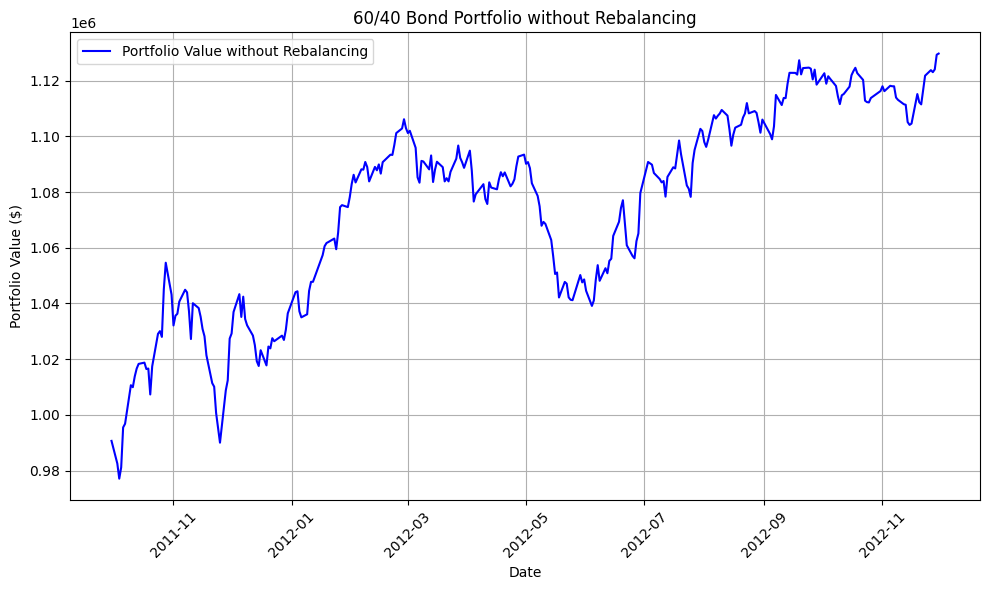

Final Portfolio Value (Non-Rebalancing): $1,129,704.13


In [26]:
#### 60/40 Bond Non-Rebalancing Portfolio Construction ####

weights = {
    'Japan': 0.12,
    'T-Bills_7_10': 0.2,
    'T-Bills_20': 0.2,
    'APACxJapan': 0.12,
    'Europe': 0.12,
    'LatAm': 0.12,
    'US': 0.12,
    'Gold': 0.0,
}

# Convert weights to a Series for alignment
weights_series = pd.Series(weights)

# Calculate daily portfolio returns
portfolio_return = (returns[weights_series.index] * weights_series).sum(axis=1)

# Calculate cumulative return
cumulative_return = (1 + portfolio_return).cumprod() - 1

# Initial investment
initial_investment_non_rebalancing = 1_000_000  # $1 million

# Calculate portfolio value over time (non-rebalanced)
portfolio_value_non_rebalancing = initial_investment_non_rebalancing * (1 + cumulative_return)

# Plot the portfolio value
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_non_rebalancing, label='Portfolio Value without Rebalancing', color='blue')
plt.title('60/40 Bond Portfolio without Rebalancing')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print final portfolio value
print(f"Final Portfolio Value (Non-Rebalancing): ${portfolio_value_non_rebalancing.iloc[-1]:,.2f}")


In [27]:
#### 60/40 Bond Non-Rebalancing Portfolio Analytics ####

# 1) Resample to monthly frequency and calculate monthly returns
monthly_portfolio_value_nonrebal = portfolio_value_non_rebalancing.resample('ME').ffill()
monthly_returns_nonrebal = monthly_portfolio_value_nonrebal.pct_change().dropna()

# 2) Full-sample monthly volatility, then annualize
full_sample_monthly_vol_nonrebal = monthly_returns_nonrebal.std()
annualized_vol_nonrebal = full_sample_monthly_vol_nonrebal * np.sqrt(12)

# 3) Total return & Geometric means
initial_val_nonrebal = portfolio_value_non_rebalancing.iloc[0]
final_val_nonrebal = portfolio_value_non_rebalancing.iloc[-1]
total_return_nonrebal = (final_val_nonrebal - initial_val_nonrebal) / initial_val_nonrebal

n_months_nonrebal = len(monthly_returns_nonrebal)
geo_avg_monthly_return_nonrebal = (final_val_nonrebal / initial_val_nonrebal) ** (1 / n_months_nonrebal) - 1
geo_avg_yearly_return_nonrebal = (1 + geo_avg_monthly_return_nonrebal) ** 12 - 1

# 4) Sharpe Ratio
arithmetic_monthly_return_nonrebal = monthly_returns_nonrebal.mean()
annualized_arithmetic_return_nonrebal = arithmetic_monthly_return_nonrebal * 12
sharpe_ratio_nonrebal = annualized_arithmetic_return_nonrebal / annualized_vol_nonrebal

# 5) Monthly 99% VaR
VaR_99_nonrebal = monthly_returns_nonrebal.quantile(1 - 0.99)

# 6) Print results
print("### 60/40 Bonds Non-Rebalancing Portfolio Analytics ###")
print(f"Full-sample annualized monthly volatility: {annualized_vol_nonrebal:.4f}")
print(f"Total return: {total_return_nonrebal * 100:.2f}%")
print(f"Geometric avg monthly return (CAGR basis): {geo_avg_monthly_return_nonrebal * 100:.2f}%")
print(f"Geometric avg yearly return (CAGR basis): {geo_avg_yearly_return_nonrebal * 100:.2f}%")
print(f"Sharpe Ratio (Arithmetic Return / Annualized Vol): {sharpe_ratio_nonrebal:.2f}")
print(f"Monthly 99% Value at Risk (VaR): {VaR_99_nonrebal:.4f}")


### 60/40 Bonds Non-Rebalancing Portfolio Analytics ###
Full-sample annualized monthly volatility: 0.0827
Total return: 14.04%
Geometric avg monthly return (CAGR basis): 0.94%
Geometric avg yearly return (CAGR basis): 11.92%
Sharpe Ratio (Arithmetic Return / Annualized Vol): 1.41
Monthly 99% Value at Risk (VaR): -0.0376


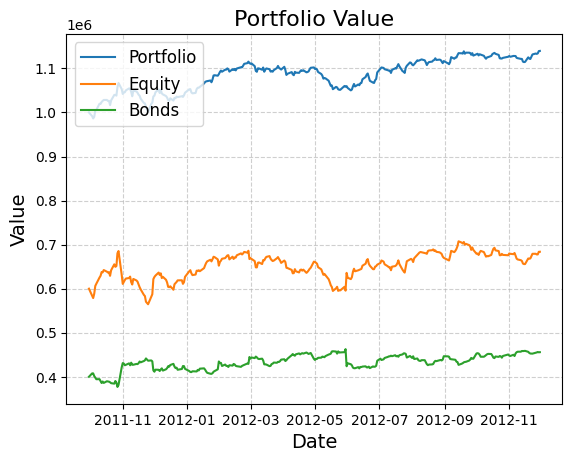

Final Portfolio Value (Rebalancing): $1,139,710.50


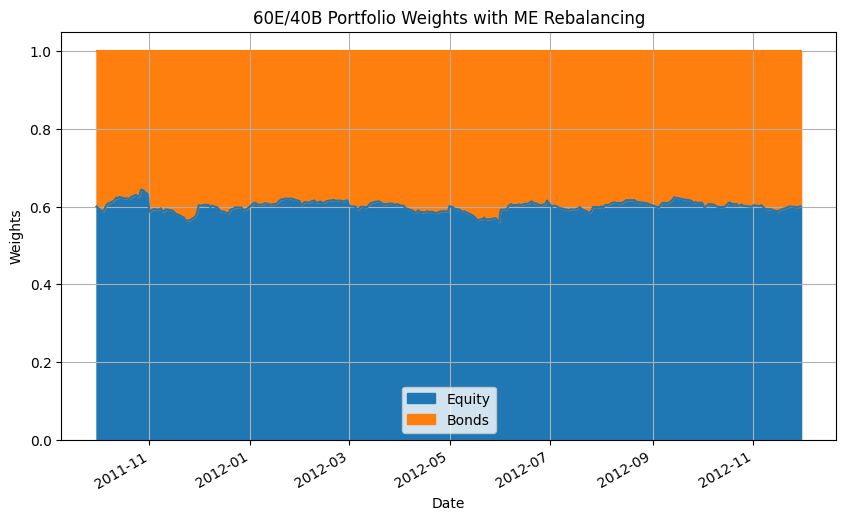

In [28]:
#### 60/40 Bond Rebalancing Portfolio Construction ####

# Define rebalancing frequency
n_frequency_rebalancing = 'ME'  # 'ME' = monthly, 'QE' = quarterly, 'YE' = yearly

# Define asset-class weights
asset_class_weights_rebalancing = {
    'equities': 0.6,
    'bonds': 0.4,
    'gold': 0.0,
}

# Equity and bond sub-weights
equity_weights_rebalancing = {
    'Japan': 0.12,
    'APACxJapan': 0.12,
    'Europe': 0.12,
    'LatAm': 0.12,
    'US': 0.12,
}
bond_weights_rebalancing = {
    'T-Bills_7_10': 0.2,
    'T-Bills_20': 0.2,
}

returns_equity = returns[['Japan', 'APACxJapan','Europe','LatAm', 'US']].mean(axis=1)
returns_bonds = returns[['T-Bills_7_10', 'T-Bills_20']].mean(axis=1)


# Determine rebalancing dates
rebal_dates_rebalancing = returns.resample(n_frequency_rebalancing).last().index
aligned_rebal_dates = returns.index.get_indexer(rebal_dates_rebalancing, method='nearest')
rebal_dates_rebalancing = returns.index[aligned_rebal_dates]

# Initialize daily portfolio value
initial_investment_rebalancing = 1_000_000
portfolio_value_rebalancing = pd.Series(index=returns.index, dtype=float)
portfolio_value_rebalancing.iloc[0] = initial_investment_rebalancing

# Initialize daily equity value
initial_investment_equity = 600_000
equity_value_rebalancing = pd.Series(index=returns.index, dtype=float)
equity_value_rebalancing.iloc[0] = initial_investment_equity


# Initialize daily bonds value
initial_investment_bonds = 400_000
bonds_value_rebalancing = pd.Series(index=returns.index, dtype=float)
bonds_value_rebalancing.iloc[0] = initial_investment_bonds


# Initialize equity weights
equity_weights = pd.Series(index=returns.index, dtype=float)
equity_weights.iloc[0] = 0.6

# Initialize bonds weights
bonds_weights = pd.Series(index=returns.index, dtype=float)
bonds_weights.iloc[0] = 0.4


# Portfolio rebalancing loop
for i in range(len(rebal_dates_rebalancing)):
    
    this_rebal_date = rebal_dates_rebalancing[i]
    
    # Update weights on rebalancing dates
    if i == 0:
        prev_rebal_date = portfolio_value_rebalancing.index[0]
    else:
        prev_rebal_date = rebal_dates_rebalancing[i - 1]

    daily_index_slice = portfolio_value_rebalancing.index[
        (portfolio_value_rebalancing.index >= prev_rebal_date) &
        (portfolio_value_rebalancing.index <= this_rebal_date)
    ]

    for d in range(1, len(daily_index_slice)):
        today = daily_index_slice[d]
        yesterday = daily_index_slice[d - 1]
        daily_equity_return = returns_equity[today]
        daily_bonds_return = returns_bonds[today]
        equity_value_rebalancing.loc[today] = equity_value_rebalancing.loc[yesterday] * (1 + daily_equity_return)
        bonds_value_rebalancing.loc[today] = bonds_value_rebalancing.loc[yesterday] * (1 + daily_bonds_return)
        
        portfolio_value_rebalancing.loc[today] = equity_value_rebalancing.loc[today] + bonds_value_rebalancing.loc[today]

        equity_weights[today] = equity_value_rebalancing.loc[today]/portfolio_value_rebalancing.loc[today]
        bonds_weights[today] = bonds_value_rebalancing.loc[today]/portfolio_value_rebalancing.loc[today]

    # Rebalance weights at the end of this period
    if i < len(rebal_dates_rebalancing) - 1:
        equity_value_rebalancing.loc[this_rebal_date] = portfolio_value_rebalancing.loc[this_rebal_date] * 0.6
        bonds_value_rebalancing.loc[this_rebal_date] = portfolio_value_rebalancing.loc[this_rebal_date] * 0.4 

        
# Ensure the portfolio value has daily entries
portfolio_value_rebalancing.ffill(inplace=True)

portfolio_value_rebalancing = pd.concat([portfolio_value_rebalancing, equity_value_rebalancing, bonds_value_rebalancing], axis=1)
portfolio_value_rebalancing.rename(columns={list(portfolio_value_rebalancing)[0]:'Portfolio', 
                                            list(portfolio_value_rebalancing)[1]:'Equity',
                                            list(portfolio_value_rebalancing)[2]:'Bonds',}, inplace=True)

# Plot the portfolio value
for column in portfolio_value_rebalancing.columns:
    plt.plot(portfolio_value_rebalancing.index, portfolio_value_rebalancing[column], label=column) 

# Add labels, title, and legend
plt.title("Portfolio Value", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print final portfolio value
print(f"Final Portfolio Value (Rebalancing): ${portfolio_value_rebalancing.iloc[-1]['Portfolio']:,.2f}")


portfolio_weights = pd.concat([equity_weights, bonds_weights], axis=1)
portfolio_weights.rename(columns={list(portfolio_weights)[0]:'Equity', 
                                  list(portfolio_weights)[1]:'Bonds'}, inplace=True)

portfolio_weights.plot(figsize=(10, 6), kind='area', stacked=True)
plt.title(f'60E/40B Portfolio Weights with {n_frequency_rebalancing} Rebalancing')
plt.xlabel('Date')
plt.ylabel('Weights')
plt.grid(True)
plt.show()


In [29]:
#### 60/40 Bond Rebalancing Portfolio Analytics ####

# 1) Resample to monthly frequency and calculate monthly returns
monthly_portfolio_value_rebalancing = portfolio_value_rebalancing.resample('ME').ffill()
monthly_returns_rebalancing = monthly_portfolio_value_rebalancing["Portfolio"].pct_change().dropna()

# 2) Full-sample monthly volatility, then annualize
full_sample_monthly_vol_rebalancing = monthly_returns_rebalancing.std()
annualized_vol_rebalancing = full_sample_monthly_vol_rebalancing * np.sqrt(12)

# 3) Total return & Geometric means
initial_val_rebalancing = portfolio_value_rebalancing.iloc[0]["Portfolio"]
final_val_rebalancing = portfolio_value_rebalancing.iloc[-1]["Portfolio"]
total_return_rebalancing = (final_val_rebalancing - initial_val_rebalancing) / initial_val_rebalancing

n_months_rebalancing = len(monthly_returns_rebalancing)
geo_avg_monthly_return_rebalancing = (final_val_rebalancing / initial_val_rebalancing) ** (1 / n_months_rebalancing) - 1
geo_avg_yearly_return_rebalancing = (1 + geo_avg_monthly_return_rebalancing) ** 12 - 1

# 4) Sharpe Ratio
arithmetic_monthly_return_rebalancing = monthly_returns_rebalancing.mean()
annualized_arithmetic_return_rebalancing = arithmetic_monthly_return_rebalancing * 12
sharpe_ratio_rebalancing = annualized_arithmetic_return_rebalancing / annualized_vol_rebalancing

# 5) Monthly 99% VaR
VaR_99_rebalancing = monthly_returns_rebalancing.quantile(1 - 0.99)

# 6) Print results
print("### 60/40 Bond Rebalancing Portfolio Analytics ###")
print(f"Full-sample annualized monthly volatility: {annualized_vol_rebalancing:.4f}")
print(f"Total return: {total_return_rebalancing * 100:.2f}%")
print(f"Geometric avg monthly return (CAGR basis): {geo_avg_monthly_return_rebalancing * 100:.2f}%")
print(f"Geometric avg yearly return (CAGR basis): {geo_avg_yearly_return_rebalancing * 100:.2f}%")
print(f"Sharpe Ratio (Arithmetic Return / Annualized Vol): {sharpe_ratio_rebalancing:.2f}")
print(f"Monthly 99% Value at Risk (VaR): {VaR_99_rebalancing:.4f}")


### 60/40 Bond Rebalancing Portfolio Analytics ###
Full-sample annualized monthly volatility: 0.0817
Total return: 13.97%
Geometric avg monthly return (CAGR basis): 0.94%
Geometric avg yearly return (CAGR basis): 11.86%
Sharpe Ratio (Arithmetic Return / Annualized Vol): 1.42
Monthly 99% Value at Risk (VaR): -0.0356
